In [1]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
from wm import Image as Image
from wm.moments import RadialHarmonicFourierMoment
from wm.moments import ZernikeMoment
from wm.moments import PseudoZernikeMoment

In [4]:
w = np.random.randint(2, size=64)

## RHFM

In [5]:
%%time
N = 64
order = 50
im = Image('images/monochrome/arctichare_'+str(N)+'.png', colored=False)
RHFM = RadialHarmonicFourierMoment(order, N, Vfile='V_RHFM_'+str(N)+'.h5')

CPU times: user 107 ms, sys: 93.3 ms, total: 200 ms
Wall time: 790 ms


In [6]:
%%time
E = RHFM.encode(im, w, verbose=True)

CPU times: user 971 ms, sys: 82.8 ms, total: 1.05 s
Wall time: 965 ms


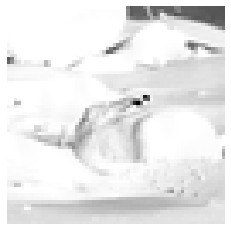

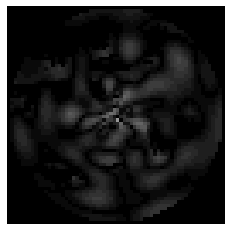

In [7]:
E.show()
imdiff = np.abs(im.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [8]:
%%time
w2 = RHFM.decode(E, pos=len(w), verbose=True)
print(w)
print(np.array(w2))

[1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1]
[1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1]
CPU times: user 104 ms, sys: 0 ns, total: 104 ms
Wall time: 97.1 ms


In [9]:
RHFM.unloadVfile()

## ZM

In [10]:
%%time
N = 64
order = 50
im = Image('images/monochrome/arctichare_'+str(N)+'.png', colored=False)
ZM = ZernikeMoment(order, N, Vfile='V_ZM_'+str(N)+'.h5')

CPU times: user 82.4 ms, sys: 184 ms, total: 266 ms
Wall time: 1.02 s


In [11]:
%%time
E = ZM.encode(im, w, verbose=True)

CPU times: user 7.95 s, sys: 511 ms, total: 8.46 s
Wall time: 7.72 s


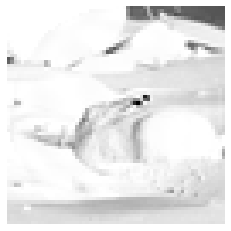

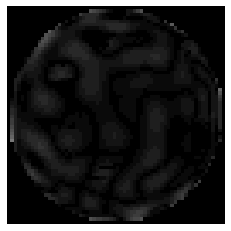

In [12]:
E.show()
imdiff = np.abs(im.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [13]:
%%time
w2 = ZM.decode(E, pos=len(w), verbose=True)
print(w)
print(np.array(w2))

[1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1]
[1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1]
CPU times: user 6.83 s, sys: 461 ms, total: 7.29 s
Wall time: 6.69 s


In [14]:
ZM.unloadVfile()

## PZM

In [15]:
%%time
N = 64
order = 50
im = Image('images/monochrome/arctichare_'+str(N)+'.png', colored=False)
PZM = PseudoZernikeMoment(order, N, Vfile='V_PZM_'+str(N)+'.h5')

CPU times: user 77.2 ms, sys: 136 ms, total: 213 ms
Wall time: 878 ms


In [16]:
%%time
E = PZM.encode(im, w, verbose=True)

CPU times: user 7.53 s, sys: 479 ms, total: 8.01 s
Wall time: 7.4 s


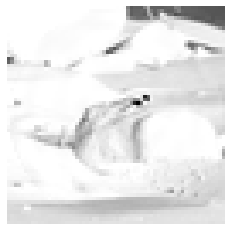

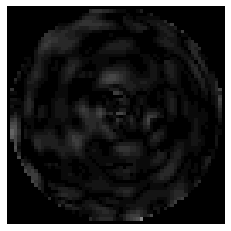

In [17]:
E.show()
imdiff = np.abs(im.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [18]:
%%time
w2 = PZM.decode(E, pos=len(w), verbose=True)
print(w)
print(np.array(w2))

[1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1]
[1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1]
CPU times: user 6.74 s, sys: 499 ms, total: 7.24 s
Wall time: 6.64 s


In [19]:
PZM.unloadVfile()